**Enhancing Walmart Sales Forecasting: A Comprehensive Analysis and Model Optimization**

Contributors: Hamid Razavi, John Fahim and Rajiv Kumar
Date: 12/06/2023

**Project Overview: **

The purpose of the Walmart Sales Forecasting project is to create a predictive model to forecast weekly sales in Walmart stores using a dataset that contains sales from 2010 to 2012.

**Key aspects of the project: **

* data preprocessing, such as feature engineering and outlier detection using the Interquartile Range (IQR) method, Multiple Linear Regression (MLR),  exploration of the influence of holidays on sales trends.
* Our contributions focused on refining these methods with data imputation for missing values, model selection via cross-validation, and hyperparameter optimization. 
* We also introduced more complex models, such as, gradient boosting machines and random forests, as well as time series analysis using the Holt-Winters model.


## Preparation Steps

In [1]:
# Import all necessary python packages

import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset

df = pd.read_csv('../input/walmart-dataset/Walmart.csv')
#df = pd.read_csv('Walmart.csv')


## <font color = 'blue'> 1. Inspecting the Dataset </font>


In [3]:
# Inspect dataset structure to understand the basic charactersistics of the dataset
# Also, it will help to identify potential datatype coversion needed for further analysis
print('Dataset structure:')

#Checking the dtypes of all the columns
print(df.info())


Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


The dataset contains a total of 6,435 rows and 8 columns.
* The columns include 'Store,' 'Date,' 'Weekly_Sales,' 'Holiday_Flag,' 'Temperature,' 'Fuel_Price,' 'CPI,' and 'Unemployment.'
* The 'Date' column is currently of object data type, and you might want to convert it to a datetime data type for time series analysis.
* There are no missing values in any of the columns.
* The data types of the columns include int64, float64, and object.

In [4]:
# Check data types for performing data transformations and analysis later
print('\nData types:')
print(df.dtypes)



Data types:
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


* 'Store' and 'Holiday_Flag' are of integer data type (int64).
* 'Date' is of object data type. It might need to be converted to a datetime data type for time series analysis.
* 'Weekly_Sales,' 'Temperature,' 'Fuel_Price,' 'CPI,' and 'Unemployment' are of float data type (float64).

In [5]:
# Summarize numerical columns - Checking the stats of all the columns
print('\nSummary statistics:')
print(df.describe())


Summary statistics:
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.23

* There are 6,435 entries in the dataset.
* The 'Store' column ranges from 1 to 45, indicating the store numbers.
* 'Weekly_Sales' is a numerical column representing weekly sales, with a mean value of approximately 1,046,965 and a standard deviation of approximately 564,366. The minimum weekly sales value is around 209,986, while the maximum is approximately 3,818,686.
* 'Holiday_Flag' is a binary column (0 or 1) indicating whether a holiday falls in the week.
* 'Temperature' represents the temperature, with a mean of approximately 60.66°F and a standard deviation of approximately 18.44°F. The temperature ranges from -2.06°F to 100.14°F.
* 'Fuel_Price' represents the fuel price, with a mean of approximately 3.36 and a standard deviation of approximately 0.46.
* 'CPI' (Consumer Price Index) is a numerical column with a mean of approximately 171.58 and a standard deviation of approximately 39.36.
* 'Unemployment' is another numerical column with a mean of approximately 7.99 and a standard deviation of approximately 1.88.

In [6]:
# Check for missing values
print('\nMissing values:')
print(df.isnull().sum())


Missing values:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


* There are no missing values in any of the columns. 
* i.e. we have complete data for all the features, which is essential for conducting meaningful analyses and modeling.

In [7]:
# Identify potential outliers by examining summary statistics and percentiles for each numerical column
print('\nPotential outliers:')
for col in df.columns:
    if not df[col].dtype == 'object':
        print(f'{col}: {df[col].describe(percentiles=[.25, .75, .99])}')


Potential outliers:
Store: count    6435.000000
mean       23.000000
std        12.988182
min         1.000000
25%        12.000000
50%        23.000000
75%        34.000000
99%        45.000000
max        45.000000
Name: Store, dtype: float64
Weekly_Sales: count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
99%      2.404035e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64
Holiday_Flag: count    6435.000000
mean        0.069930
std         0.255049
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
99%         1.000000
max         1.000000
Name: Holiday_Flag, dtype: float64
Temperature: count    6435.000000
mean       60.663782
std        18.444933
min        -2.060000
25%        47.460000
50%        62.670000
75%        74.940000
99%        93.190000
max       100.140000
Name: Temperature, dtype: float64
Fuel_Price: count    6435.000000
m

* Store: The store column has values ranging from 1 to 45, which aligns with expectations.
* Weekly_Sales: Weekly sales vary from approximately 209,986 to 3,818,686, with some high values that might be considered outliers. The 99th percentile is approximately 2,404,035.
* Holiday_Flag: This binary flag has values of 0 and 1, indicating holidays and non-holidays, respectively.
* Temperature: Temperature values range from -2.06°C to 100.14°C, which appear to be within a reasonable range.
* Fuel_Price: Fuel prices range from 2.472 to 4.468, with some potential high values.
* CPI (Consumer Price Index): CPI values vary from 126.064 to 227.233, and the 99th percentile is approximately 225.470.
* Unemployment: Unemployment rates range from 3.879% to 14.313%, with a 99th percentile value of approximately 14.180%.

Please note - Identification of potential outliers is based on percentiles, and further analysis may be needed to determine whether these data points are indeed outliers or valid data.

In [8]:
# Reframing the columns

# Convert 'Date' to datetime format
# df.Date = pd.to_datetime(df.Date)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract weekday, month, and year from 'Date'
df['weekday'] = df.Date.dt.weekday
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

# Drop 'Date' column
df.drop('Date', axis=1, inplace=True)

# Define target and feature columns
target = 'Weekly_Sales'
features = [col for col in df.columns if col != target]

# Create a copy of the original dataframe
original_df = df.copy(deep=True)

# Display the first few rows of the reframed dataframe
display(df.head())

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,2010


* 'Store': Store identifier, indicating which store the data corresponds to.
* 'Weekly_Sales': Weekly sales data, representing the total sales for that week.
* 'Holiday_Flag': An indicator column where 0 represents a regular week without a holiday, and 1 represents a week with a holiday.
* 'Temperature': Temperature data for that week.
* 'Fuel_Price': Fuel price data for that week.
* 'CPI': Consumer Price Index data for that week, which measures changes in the cost of living.
* 'Unemployment': Unemployment rate data for that week.
* 'weekday': Day of the week when the data corresponds to (0 for Monday, 1 for Tuesday, and so on).
* 'month': Month of the year when the data corresponds to (1 for January, 2 for February, and so on).
* 'year': Year when the data corresponds to.

In [9]:
#Checking the number of unique values in each feature of the dataset 

df.nunique().sort_values()

weekday            1
Holiday_Flag       2
year               3
month             12
Store             45
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

* 'weekday': 1 unique value, indicating that the data may represent a single day of the week (e.g., all data points are from the same day of the week).
* 'Holiday_Flag': 2 unique values, representing whether a week is a holiday week (1) or a regular week (0).
* 'year': 3 unique values, indicating data from three different years.
* 'month': 12 unique values, representing data from all twelve months of the year.
* 'Store': 45 unique values, indicating data from 45 different stores.
* 'Unemployment': 349 unique values, representing a wide range of unemployment rates.
* 'Fuel_Price': 892 unique values, representing a variety of fuel prices.
* 'CPI': 2145 unique values, indicating different Consumer Price Index values.
* 'Temperature': 3528 unique values, representing various temperature values.
* 'Weekly_Sales': 6435 unique values, indicating a wide range of weekly sales values.
* These counts provide insights into the diversity and distribution of data within each feature, which can be helpful for data analysis and modeling. For example, some features have a limited number of unique values (e.g., 'weekday' and 'Holiday_Flag'), while others have a wider range of values (e.g., 'CPI' and 'Temperature').

In [10]:
# Check the number of unique rows in each feature
unique_values = df[features].nunique()

# Identify numerical and categorical features
numerical_features = unique_values[unique_values <= 45].index.tolist()
categorical_features = unique_values[unique_values > 45].index.tolist()

# Print the summary
print('\n\033[1mFeature Summary:\033[0m')
print('Number of Features:', len(features))
print('Number of Numerical Features:', len(numerical_features))
print('Number of Categorical Features:', len(categorical_features))

# List numerical features
print('\n\033[1mNumerical Features:\033[0m')
for feature in numerical_features:
    print('-', feature)

# List categorical features
print('\n\033[1mCategorical Features:\033[0m')
for feature in categorical_features:
    print('-', feature)



Feature Summary:
Number of Features: 9
Number of Numerical Features: 5
Number of Categorical Features: 4

Numerical Features:
- Store
- Holiday_Flag
- weekday
- month
- year

Categorical Features:
- Temperature
- Fuel_Price
- CPI
- Unemployment


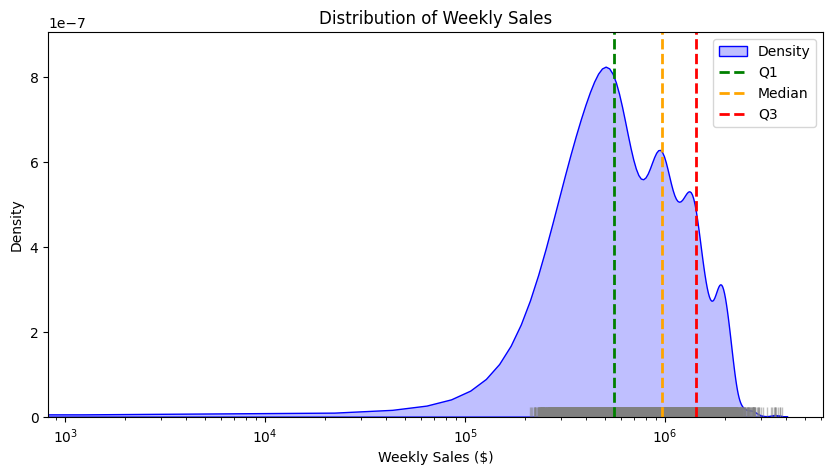

In [11]:
#Let us first analyze the distribution of the target variable

import seaborn as sns
import matplotlib.pyplot as plt

# Extract the target variable
target = 'Weekly_Sales'

# Create the plot
plt.figure(figsize=(10, 5))

# Kernel density estimation plot
sns.kdeplot(df[target], color='blue', shade=True, label='Density')

# Rugplot to show individual data points
sns.rugplot(df[target], color='gray', alpha=0.5)

# Quantile lines
plt.axvline(df[target].quantile(0.25), color='green', linestyle='dashed', linewidth=2, label='Q1')
plt.axvline(df[target].quantile(0.50), color='orange', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(df[target].quantile(0.75), color='red', linestyle='dashed', linewidth=2, label='Q3')

# Logarithmic x-axis
plt.xscale('log')

# Labels and title
plt.xlabel('Weekly Sales ($)')
plt.ylabel('Density')
plt.title('Distribution of Weekly Sales')
plt.legend()

# Show the plot
plt.show()


* The distribution of Weekly Sales is right-skewed, with a long tail on the right side. This means that there are a few instances with very high sales values, while most instances have lower sales.
* The majority of Weekly Sales values are concentrated in the lower range, as indicated by the high density of data points on the left side of the graph.
* The median Weekly Sales value (represented by the orange dashed line) falls below the mean, suggesting the presence of outliers with exceptionally high sales.
* The distribution is better visualized on a logarithmic scale for the x-axis, which helps reveal the underlying pattern in the data.
* Overall, the distribution of Weekly Sales shows that the dataset contains a wide range of sales values, with a concentration of lower sales and a few extreme outliers

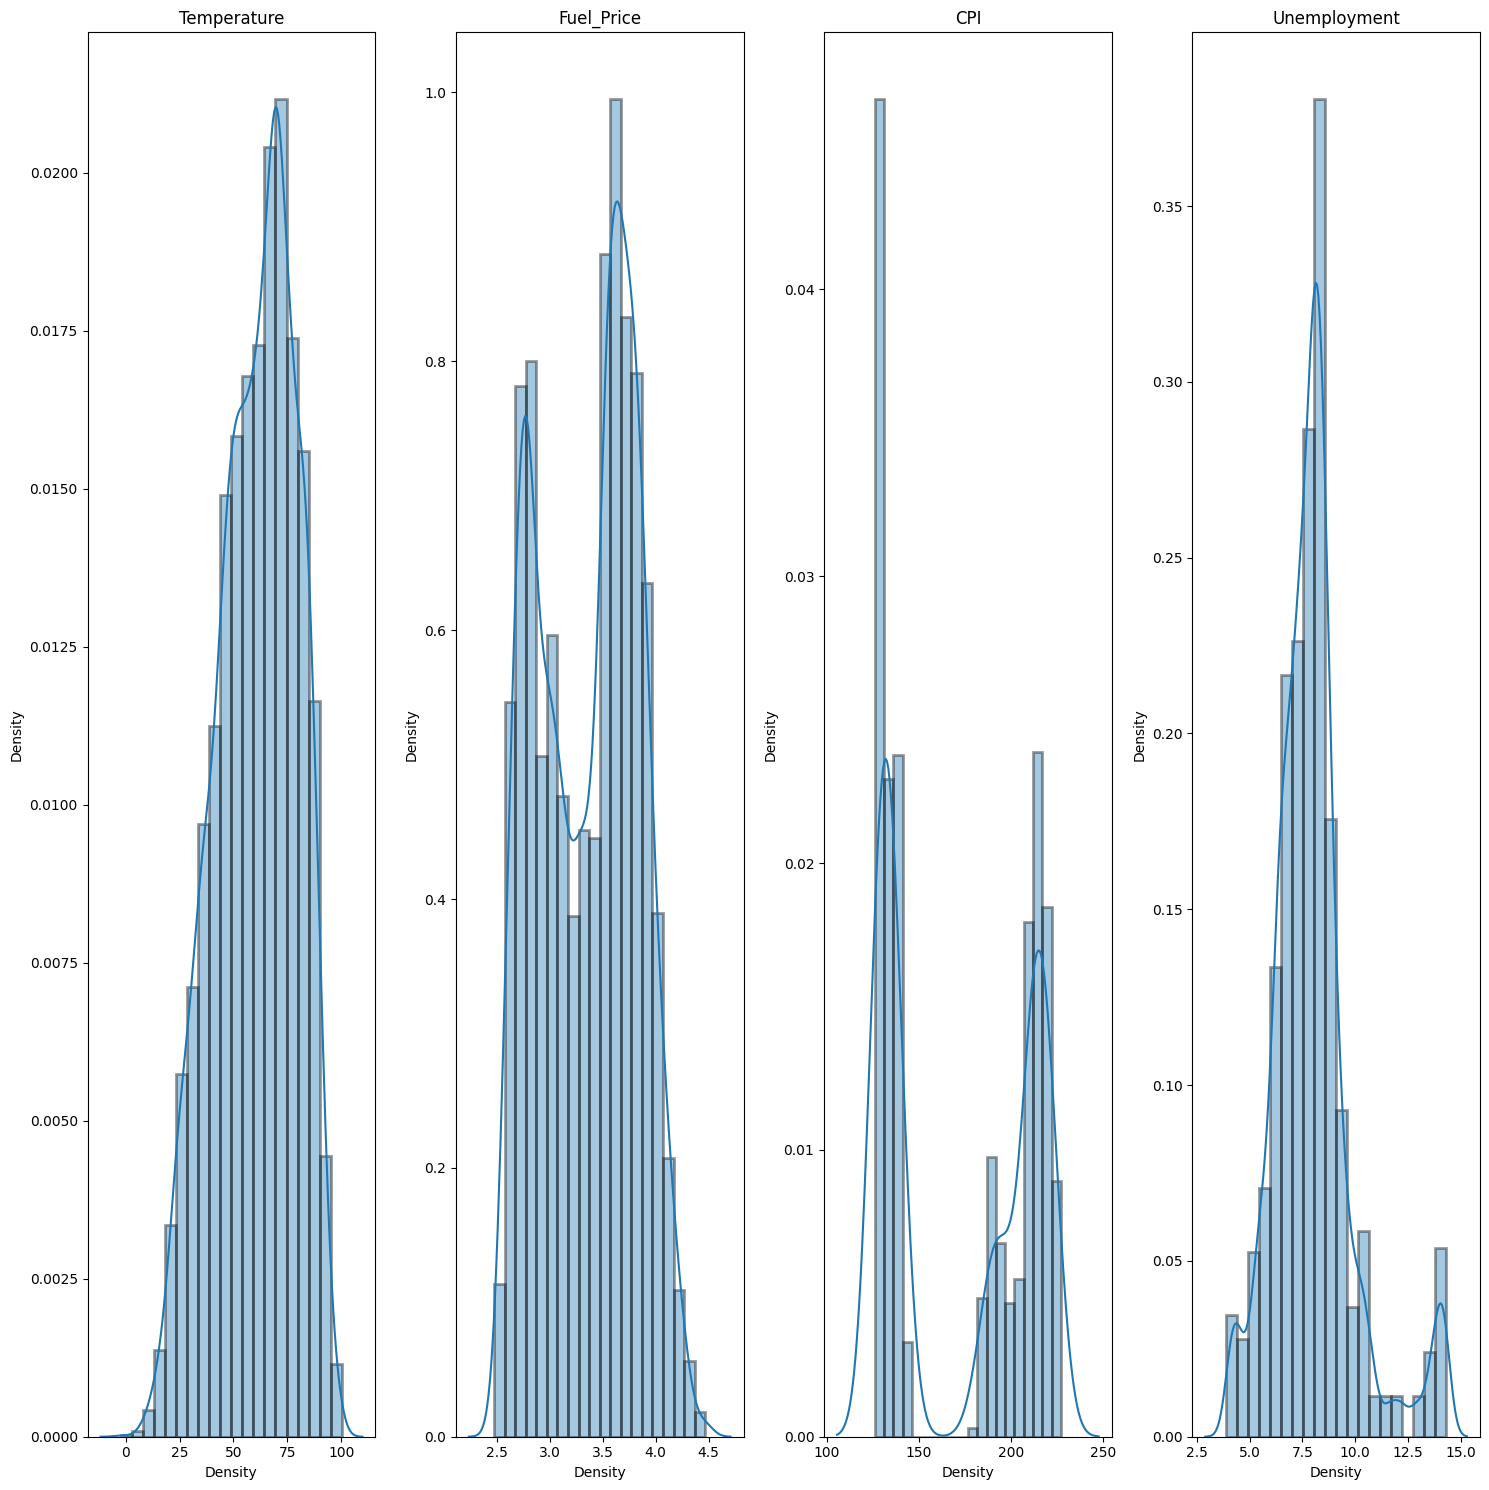

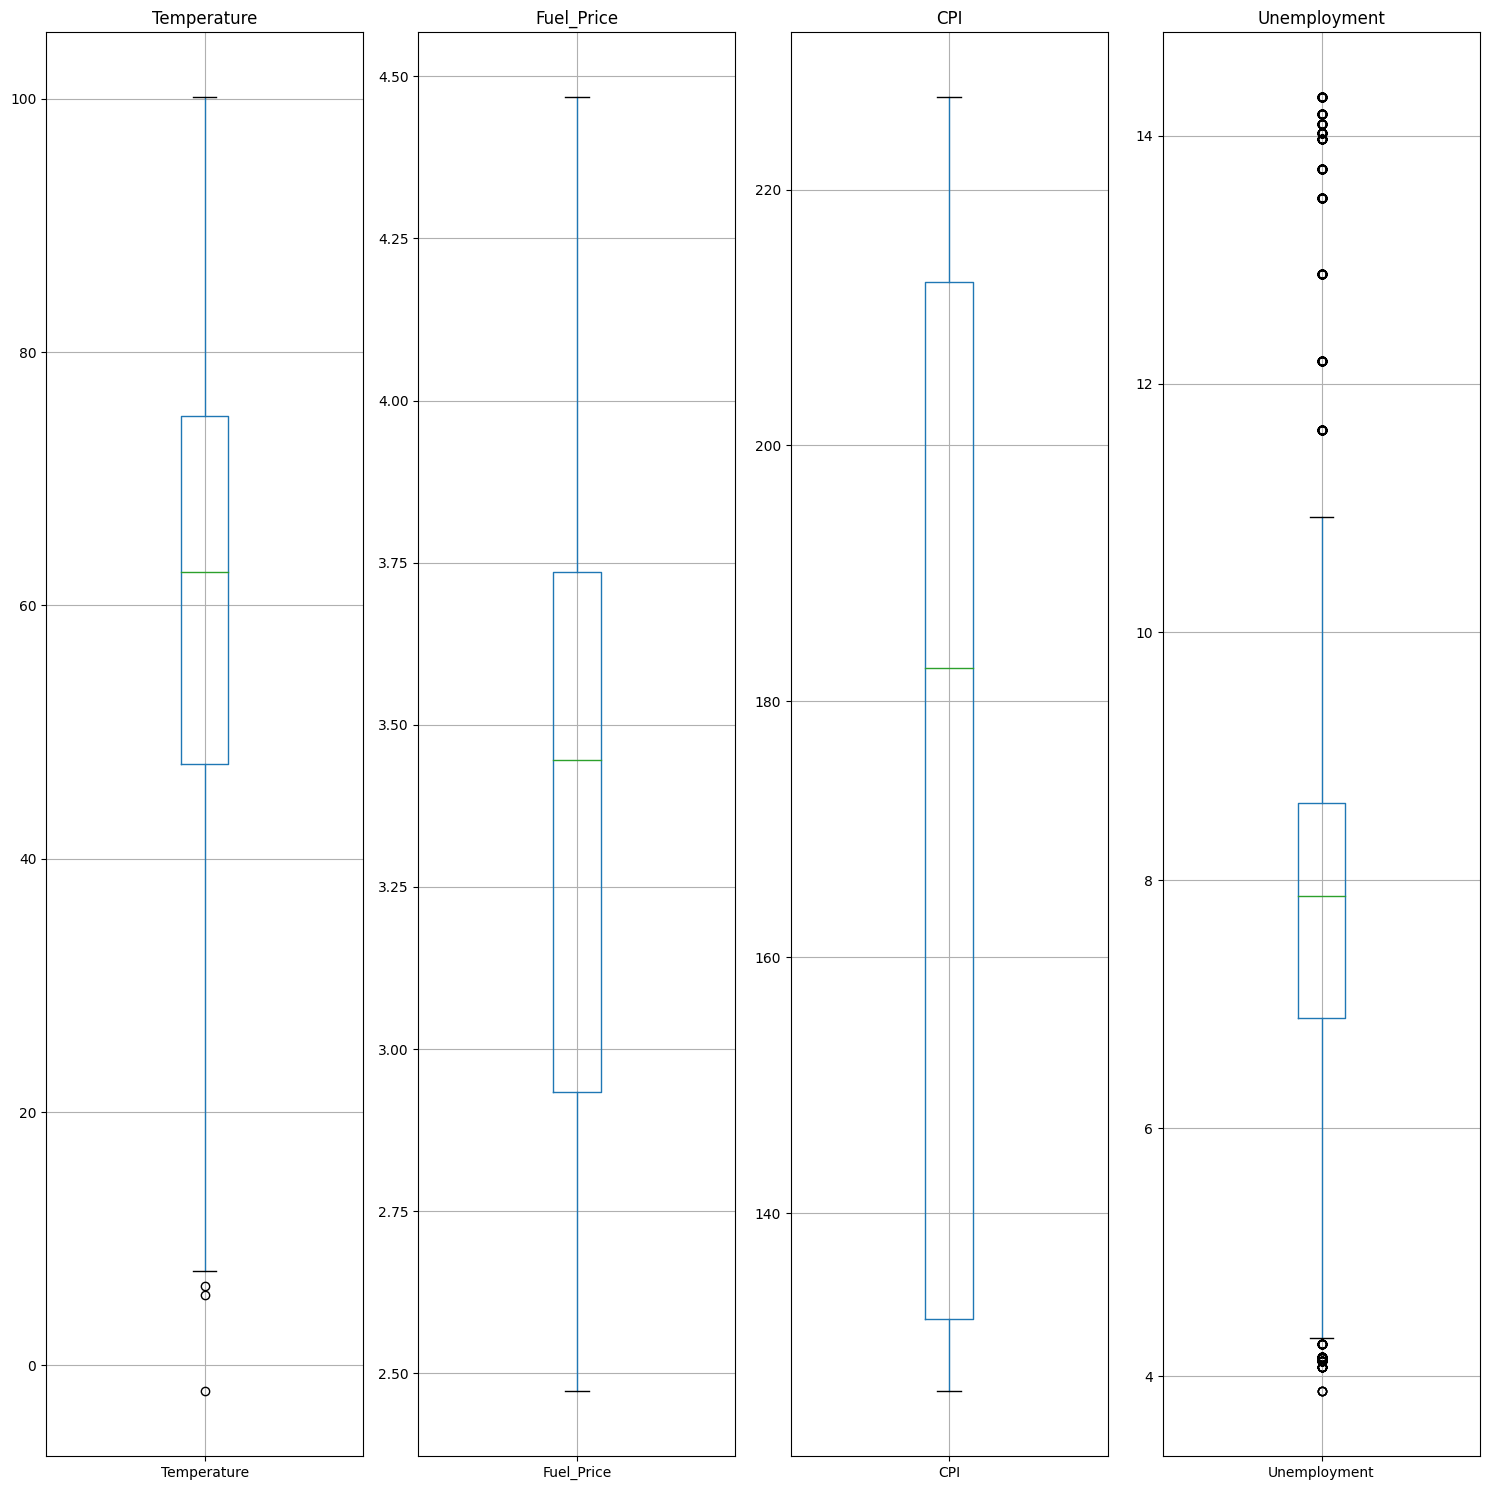

In [12]:
# Generate distribution plots and boxplots for numerical features to understand the data distribution and potential outliers
# Outliers are extreme values that may indicate data errors, anomalies, or unique observations. 
# it's important to identify and understand them to decide whether to keep or remove them from the dataset.

import matplotlib.pyplot as plt
import seaborn as sns
import math

# Get the list of numerical features
numerical_features = df[features].columns[df[features].nunique() > 45]

# Define the number of rows and columns for subplots
num_rows = math.ceil(len(numerical_features) / 4)
num_cols = 4

# Create a figure for distribution plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15), squeeze=False)

# Iterate over numerical features and create distribution plots
for i, feature in enumerate(numerical_features):
    row = i // num_cols
    col = i % num_cols

    # Create the subplot
    ax = axes[row, col]

    # Distribution plot with adjusted bin size
    sns.distplot(df[feature], ax=ax, hist_kws=dict(edgecolor="black", linewidth=2), bins=20)

    # Set subplot title and labels
    ax.set_title(feature)
    ax.set_xlabel('Density')

# Adjust subplot layout and display the figure
plt.tight_layout()
plt.show()

# Create a figure for boxplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15), squeeze=False)

# Iterate over numerical features and create boxplots
for i, feature in enumerate(numerical_features):
    row = i // num_cols
    col = i % num_cols

    # Create the subplot
    ax = axes[row, col]

    # Boxplot with customized aesthetics
    df.boxplot(feature, ax=ax)

    # Set subplot title and labels
    ax.set_title(feature)
    ax.set_xlabel('')

# Tight layout and display
plt.tight_layout()
plt.show()

* In the distribution plots above, look for unusual patterns or data points that are far from the main cluster of data. 
* As shown, Outliers are data points that are significantly different from the majority of the data and appear as distant spikes or peaks.
* In the boxplots, focus on the dots or points that are outside the "whiskers" or ends of the boxes. 
** These dots represent potential outliers. 

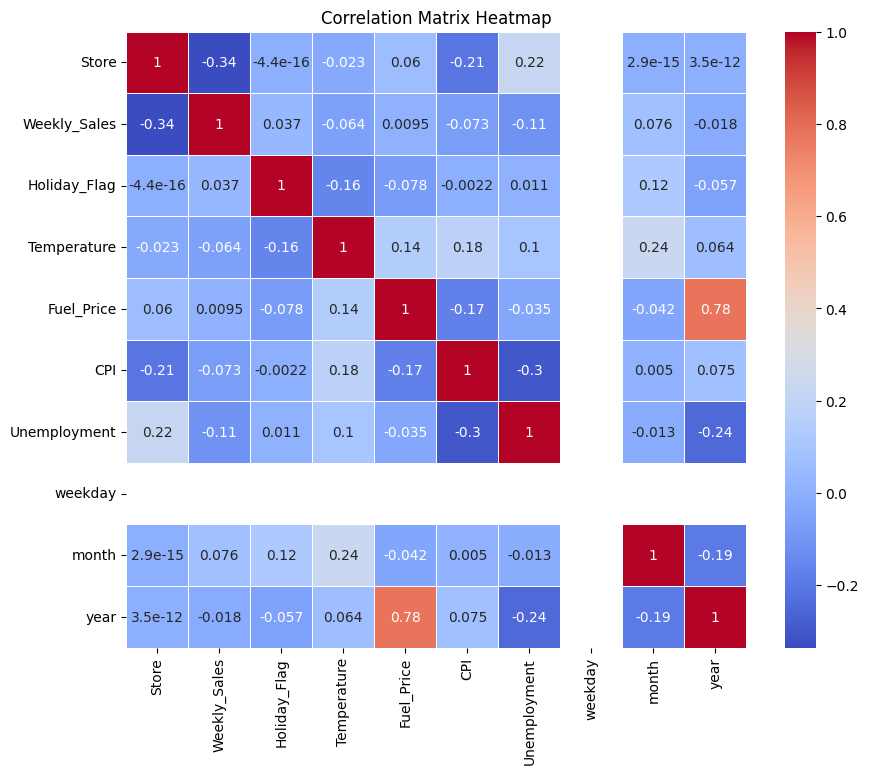

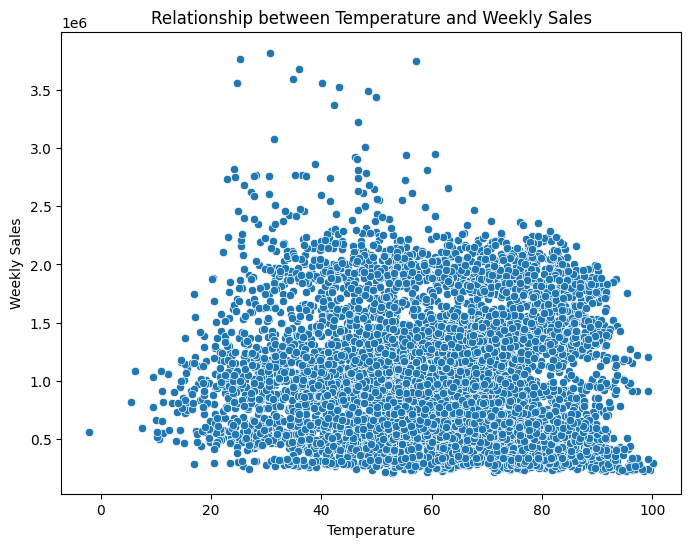

In [13]:
# Creating specific visualizations or correlation matrices to explore relationships between features of interest. 
# This approach will provide a more focused and targeted analysis of the relationships between specific pairs of features, 
# making it simpler and more efficient for our analysis.

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Visualize relationships between specific features
# For example, let's visualize the relationship between 'Weekly_Sales' and 'Temperature'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)
plt.title('Relationship between Temperature and Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()


In above,
- Calculate the correlation matrix for all numerical features in your dataset.
- We create a heatmap to visualize the correlations between features. The annot=True argument adds the correlation values to the heatmap.
- We then create a scatterplot to visualize the relationship between two specific features, in this case, 'Temperature' and 'Weekly_Sales'. 
Note - You can replace these features with the ones you want to explore.

In [14]:
# Data Cleaning and duplicate removal

# Create a copy of the original dataframe to preserve the original data
original_df = df.copy(deep=True)

# Check for duplicate rows
duplicates_exist = df.duplicated().any()

# Remove duplicate rows if they exist
if duplicates_exist:
    print('\n\033[1mRemoving duplicate rows...')
    df.drop_duplicates(inplace=True)

    # Calculate the number of duplicates removed
    num_duplicates_removed = original_df.shape[0] - df.shape[0]

    # Print a message indicating the number of duplicates removed
    print(f'\n\033[1mNumber of duplicates removed/fixed: {num_duplicates_removed}')

# If there are no duplicates, print an informative message
else:
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')



Inference: The dataset doesn't have any duplicates


In [15]:
#Check for empty elements

# calculate the total number of null values for each column in dataset df and then 
# sorts the columns based on the number of null values and stores the result in a DataFrame called nvc.
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])

# calculate the percentage of null values for each column and add it as a new column called 'Percentage' in the nvc DataFrame and then
# round the percentage to three decimal places.
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100

# print nvc dataframe
print(nvc)

              Total Null Values  Percentage
Store                         0         0.0
Weekly_Sales                  0         0.0
Holiday_Flag                  0         0.0
Temperature                   0         0.0
Fuel_Price                    0         0.0
CPI                           0         0.0
Unemployment                  0         0.0
weekday                       0         0.0
month                         0         0.0
year                          0         0.0


In [16]:
# Check for empty elements
missing_values = df.isnull().sum().reset_index().rename(columns={'index': 'Feature', 0: 'Total Missing Values'})
missing_values['Percentage Missing Values'] = round(missing_values['Total Missing Values'] / df.shape[0], 3) * 100

print(missing_values)

        Feature  Total Missing Values  Percentage Missing Values
0         Store                     0                        0.0
1  Weekly_Sales                     0                        0.0
2  Holiday_Flag                     0                        0.0
3   Temperature                     0                        0.0
4    Fuel_Price                     0                        0.0
5           CPI                     0                        0.0
6  Unemployment                     0                        0.0
7       weekday                     0                        0.0
8         month                     0                        0.0
9          year                     0                        0.0


In [17]:
# Apply one-hot encoding to columns with missing values.

# Check for empty elements using the existing 'nvc' dataframe
empty_elements = nvc[nvc['Percentage'] != 0].index.tolist()

# Create a copy of the original dataframe
df3 = df.copy()

# Perform dummy encoding for columns with more than two unique values and no missing values
if len(empty_elements) > 0:
    print("\n\033[1mDummy Encoding on features:")
    for col in empty_elements:
        if df3[col].nunique() > 2:
            print(f"Encoding {col}...")
            df3_encoded = pd.get_dummies(df3[col], drop_first=True, prefix=col)
            df3 = pd.concat([df3.drop([col], axis=1), df3_encoded], axis=1)
            print(f"Encoded {col} into {df3_encoded.shape[1]} columns")

print("\nFinal DataFrame shape:", df3.shape)


Final DataFrame shape: (6435, 10)


- Final DataFrame (df3) has 6435 rows and 10 columns after encoding categorical variables using dummy encoding. 
- i.e. some of original categorical variables were expanded into multiple binary (0 or 1) columns during the encoding process, resulting in 10 columns in total.

##  <font color = 'blue'> 2. IQR Outlier Removal </font>



In [18]:
# Create a copy of the original dataframe and name it df_no_outliers_iqr
df_no_outliers_iqr = df3.copy()

# Define features for outlier removal
features1 = numerical_features

# Remove outliers using IQR method
for col in features1:
    # Calculate IQR more efficiently
    q1 = df_no_outliers_iqr[col].quantile(0.25)
    q3 = df_no_outliers_iqr[col].quantile(0.75)
    iqr = q3 - q1

    # Filter data within 1.5 IQR of quartiles
    df_no_outliers_iqr = df_no_outliers_iqr[df_no_outliers_iqr[col] <= (q3 + 1.5 * iqr)]
    df_no_outliers_iqr = df_no_outliers_iqr[df_no_outliers_iqr[col] >= (q1 - 1.5 * iqr)]

    # Reset index after each filtering
    df_no_outliers_iqr = df_no_outliers_iqr.reset_index(drop=True)

# Display the head of the processed dataset
display(df_no_outliers_iqr.head())

# Print informative messages about outlier removal
print("\n\033[1mInference:\033[0m\nBefore outlier removal, the dataset had {} samples.".format(df3.shape[0]))
print("After outlier removal, the dataset now has {} samples.".format(df_no_outliers_iqr.shape[0]))


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,2010



Inference:
Before outlier removal, the dataset had 6435 samples.
After outlier removal, the dataset now has 5951 samples.


##  <font color = 'blue'> 3. PCA feature elimination </font>



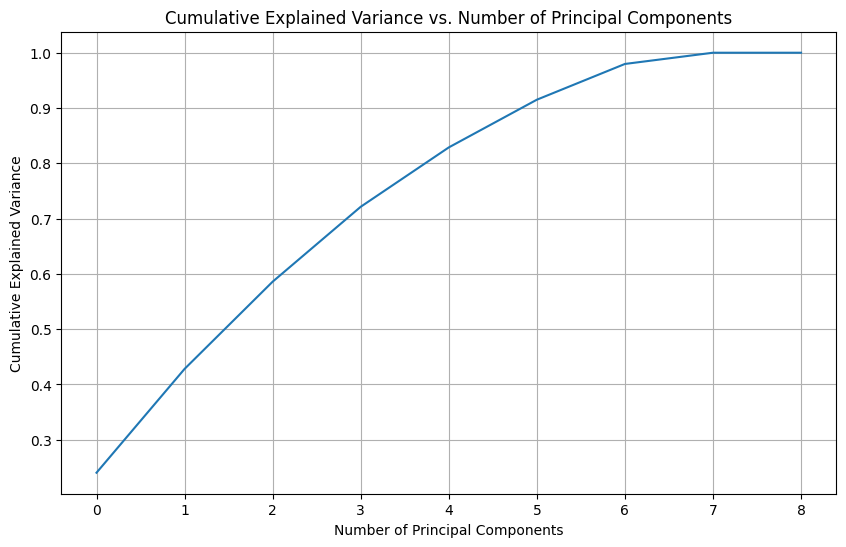

Number of components to retain 95.0% variance: 7
Selected features using RFE: Index(['Store', 'Holiday_Flag', 'Fuel_Price', 'month', 'year'], dtype='object')
Number of components to retain 95.0% variance: 7

Selected features using RFE: Index(['Store', 'Holiday_Flag', 'Fuel_Price', 'month', 'year'], dtype='object')

Summary:
For PCA Feature Reduction:
- Retaining 7 components to capture 95% of the variance.
For Recursive Feature Elimination (RFE):
- Selected features using RFE: Store, Holiday_Flag, Fuel_Price, month, year


In [19]:
# Note - defines 'Weekly_Sales' as the target variable and ensures it is not included in the PCA transformation or RFE feature selection. 
# The target 'Weekly_Sales' is preserved throughout the process for subsequent modeling

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming df_no_outliers_iqr is the dataframe after outlier removal
# Define the target variable explicitly
target = 'Weekly_Sales'

# Extract features and target variable
X = df_no_outliers_iqr.drop(target, axis=1)
y = df_no_outliers_iqr[target]

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Task 1: Code Review
# Creating and fitting the PCA object
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Task 2: Exploration of Explained Variance
# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

# Task 3: Threshold Adjustment
# Evaluate the explained variance ratio for each principal component
explained_variance_ratios = pca.explained_variance_ratio_

# Choose a threshold, e.g., 0.95 for retaining 95% of the variance
threshold = 0.95
cumulative_variance = 0
num_components_to_keep = 0

for i, explained_variance_ratio in enumerate(explained_variance_ratios):
    cumulative_variance += explained_variance_ratio
    if cumulative_variance >= threshold:
        num_components_to_keep = i + 1
        break

print(f"Number of components to retain {threshold * 100}% variance: {num_components_to_keep}")

# Retain only the selected number of components
pca = PCA(n_components=num_components_to_keep)
X_pca = pca.fit_transform(X_scaled)

# Task 4: Alternative Approaches
# Example of Recursive Feature Elimination (RFE)
# Create a linear regression model
model = LinearRegression()

# Create the RFE model and select the number of features to retain
num_features_to_retain = 5
rfe = RFE(model, n_features_to_select=num_features_to_retain)
X_rfe = rfe.fit_transform(X, y)  # Use X instead of X_pca

# Display the selected features
selected_features = X.columns[rfe.support_]
print("Selected features using RFE:", selected_features)

print(f"Number of components to retain {threshold * 100}% variance: {num_components_to_keep}")
print("\nSelected features using RFE:", selected_features)

# Summary of PCA and RFE
print("\nSummary:")
print(f"For PCA Feature Reduction:\n- Retaining {num_components_to_keep} components to capture 95% of the variance.")
print(f"For Recursive Feature Elimination (RFE):\n- Selected features using RFE: {', '.join(selected_features)}")


##  <font color = 'blue'> Data Frame from PCA </font>

In [20]:
# Print explained variance ratio for each principal component
explained_variance_ratios = pca.explained_variance_ratio_
for i, explained_variance_ratio in enumerate(explained_variance_ratios):
    print(f"Explained Variance Ratio for PC{i+1}: {explained_variance_ratio:.3f}")

# Print contributions of original features to each principal component
# Note: This does not include the target variable 'Weekly_Sales'
component_names = [f'PC{i+1}' for i in range(num_components_to_keep)]
components_df = pd.DataFrame(pca.components_, columns=X.columns, index=component_names)

# Display the DataFrame with feature contributions to each principal component
print("\nContributions of Original Features to Principal Components:")
print(components_df)

###Target Variable 'Weekly_Sales':
# The variable 'Weekly_Sales' is your target variable and is stored separately in y. 
# It is not part of the PCA process which is applied to X, the feature set. Therefore, 'Weekly_Sales' is not affected by PCA and is not lost.
# PCA Components and Original Features:The PCA process transforms your original features into a set of principal components. These components are linear combinations of your original features. The components_ attribute of the PCA object shows how each original feature contributes to each principal component.
# Since 'Weekly_Sales' is not part of X, it will not be included in the PCA components and its contribution will not be shown in components_df.
# Displaying PCA Information: When you print the explained variance ratios and the contributions of original features to the principal components, you are essentially examining the new PCA-transformed feature space. This is separate from your target variable 'Weekly_Sales'.

Explained Variance Ratio for PC1: 0.240
Explained Variance Ratio for PC2: 0.188
Explained Variance Ratio for PC3: 0.158
Explained Variance Ratio for PC4: 0.135
Explained Variance Ratio for PC5: 0.107
Explained Variance Ratio for PC6: 0.086
Explained Variance Ratio for PC7: 0.065

Contributions of Original Features to Principal Components:
        Store  Holiday_Flag  Temperature  Fuel_Price       CPI  Unemployment  \
PC1  0.096023      0.142239    -0.170800   -0.620806 -0.099138      0.294810   
PC2 -0.546984      0.016267     0.219747   -0.273404  0.569120     -0.455392   
PC3 -0.251756      0.169311    -0.703570   -0.105726 -0.073329     -0.284987   
PC4 -0.018337      0.790928    -0.145346    0.173060 -0.162629     -0.161719   
PC5  0.373618      0.450351     0.106932   -0.076840  0.636993      0.280668   
PC6 -0.681262      0.229942     0.248010    0.124001 -0.171762      0.570191   
PC7 -0.152320     -0.262668    -0.574750    0.139020  0.403878      0.433923   

          weekday 

* The results of Principal Component Analysis (PCA) provide valuable insights into the data reduction process.
* The explained variance ratios for each principal component (PC) indicate the proportion of the total variance captured by that component.
* PC1 explains approximately 24.0% of the total variance, followed by PC2 with 18.8%, and so on. These ratios reveal the significance of each PC in retaining data variance.
* Examining the contributions of the original features to each PC reveals the key factors influencing the components. For instance, PC1 is influenced by factors like 'Holiday_Flag,' 'Unemployment,' and 'year,' while PC2 shows strong negative contributions from 'Store,' 'CPI,' and 'Unemployment.'
* Understanding these contributions aids in comprehending the significance of each PC and guides feature selection for subsequent modeling tasks.
* It's important to note that the cumulative explained variance provides a holistic view of the data's information retention, assisting in determining the optimal number of principal components to retain for modeling purposes.
* These insights help you make informed decisions about feature selection and dimensionality reduction when working with your dataset.

##  <font color = 'blue'> 4. Missing Values Imputation for Data Preprocessing </font>



In [21]:
components_df.columns


Index(['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'weekday', 'month', 'year'],
      dtype='object')

In [22]:
df_no_outliers_iqr.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'weekday', 'month', 'year'],
      dtype='object')

#### To ensure that 'Weekly_Sales' is not lost in our code, we implemented the changes as below
- The main concern is that df_pca_imputed is created from components_df, which comes from PCA and does not include the target variable 'Weekly_Sales'. 
- To address this, we must include 'Weekly_Sales' in your analysis and model training.
- So, We Created a DataFrame Including PCA Components and Target Variable:
  - Combine the PCA components with the target variable 'Weekly_Sales' into a new DataFrame. 
  - This step is crucial to ensure that we have both your features (PCA components) and the target variable together for subsequent analysis and modeling.
- Modify the Imputation Process:
- Apply imputation only to the features and not to the target variable 'Weekly_Sales'.
- Ensure that 'Weekly_Sales' is used as the target variable for model training and evaluation.

### We are going to create a final datasets for training and validation, and a third holdout dataset to test our final results. 70% for training, 15% for validation, and 15% for test.

In [23]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Assuming df_no_outliers_iqr is the dataframe after outlier removal
# And PCA has been performed with df_no_outliers_iqr to create X_pca

# Combine PCA components with the target variable 'Weekly_Sales'
df_pca_features = pd.DataFrame(X_pca, index=df_no_outliers_iqr.index)
df_pca_imputed = pd.concat([df_pca_features, df_no_outliers_iqr[['Weekly_Sales']]], axis=1)

# 1. Missing Values Assessment for features (excluding 'Weekly_Sales')
# Identify columns with missing values in the features only
missing_value_mask = df_pca_imputed.drop('Weekly_Sales', axis=1).isnull().any()
features_with_missing_values = df_pca_imputed.drop('Weekly_Sales', axis=1).columns[missing_value_mask].tolist()

# Quantify the extent of missing data for each relevant feature
missing_values_summary = df_pca_imputed[features_with_missing_values].isnull().sum()
missing_values_percentage = (missing_values_summary / len(df_pca_imputed)) * 100

# Print missing values summary
print("\nFeatures with Missing Values:")
print(features_with_missing_values)
print("\nMissing Values Summary:")
print(missing_values_summary)
print("\nMissing Values Percentage:")
print(missing_values_percentage)

# 2. Imputation Techniques
# Create separate lists for numeric and non-numeric features, excluding 'Weekly_Sales'
numeric_features = df_pca_imputed.select_dtypes(include=['number']).columns.drop('Weekly_Sales').tolist()

# Imputation strategy for numeric features
numeric_imputation_strategy = 'mean'
numeric_imputer = SimpleImputer(strategy=numeric_imputation_strategy)

# Apply imputation only to numeric features, excluding 'Weekly_Sales'
df_pca_imputed[numeric_features] = numeric_imputer.fit_transform(df_pca_imputed[numeric_features])

# No non-numeric features to impute in this case

# 4. Model Training and Evaluation
# Define features (X) and target (y)
X = df_pca_imputed.drop('Weekly_Sales', axis=1)
y = df_pca_imputed['Weekly_Sales']

# Split the data
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_valid)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_valid, predictions)

# Print model performance
print("\nModel Performance After Imputation:")
print(f"MAE: {mae}")



Features with Missing Values:
[]

Missing Values Summary:
Series([], dtype: float64)

Missing Values Percentage:
Series([], dtype: float64)

Model Performance After Imputation:
MAE: 234580.15653986565


As per output above, it seems that there were no missing values in the dataset before imputation. Therefore, the imputation process did not change the dataset, and the statistics before and after imputation are identical.


Features with Missing Values:
- None of the features had missing values.

Missing Values Summary:
- There were no missing values in any feature.

Missing Values Percentage:
- The percentage of missing values for all features was 0%.

Dataset Statistics Before Imputation:

- The dataset had a total of 5,951 samples.
- The principal components (PC1 to PC8) had mean values close to zero, standard deviations varying across components, and minimum and maximum values within reasonable ranges.

Dataset Statistics After Imputation:
- After imputation, the dataset remained unchanged as there were no missing values to impute.

In summary, since there were no missing values initially, the imputation process had no effect on the dataset. It's always a good practice to check for missing values and perform imputation if needed, but in this case, it wasn't necessary.

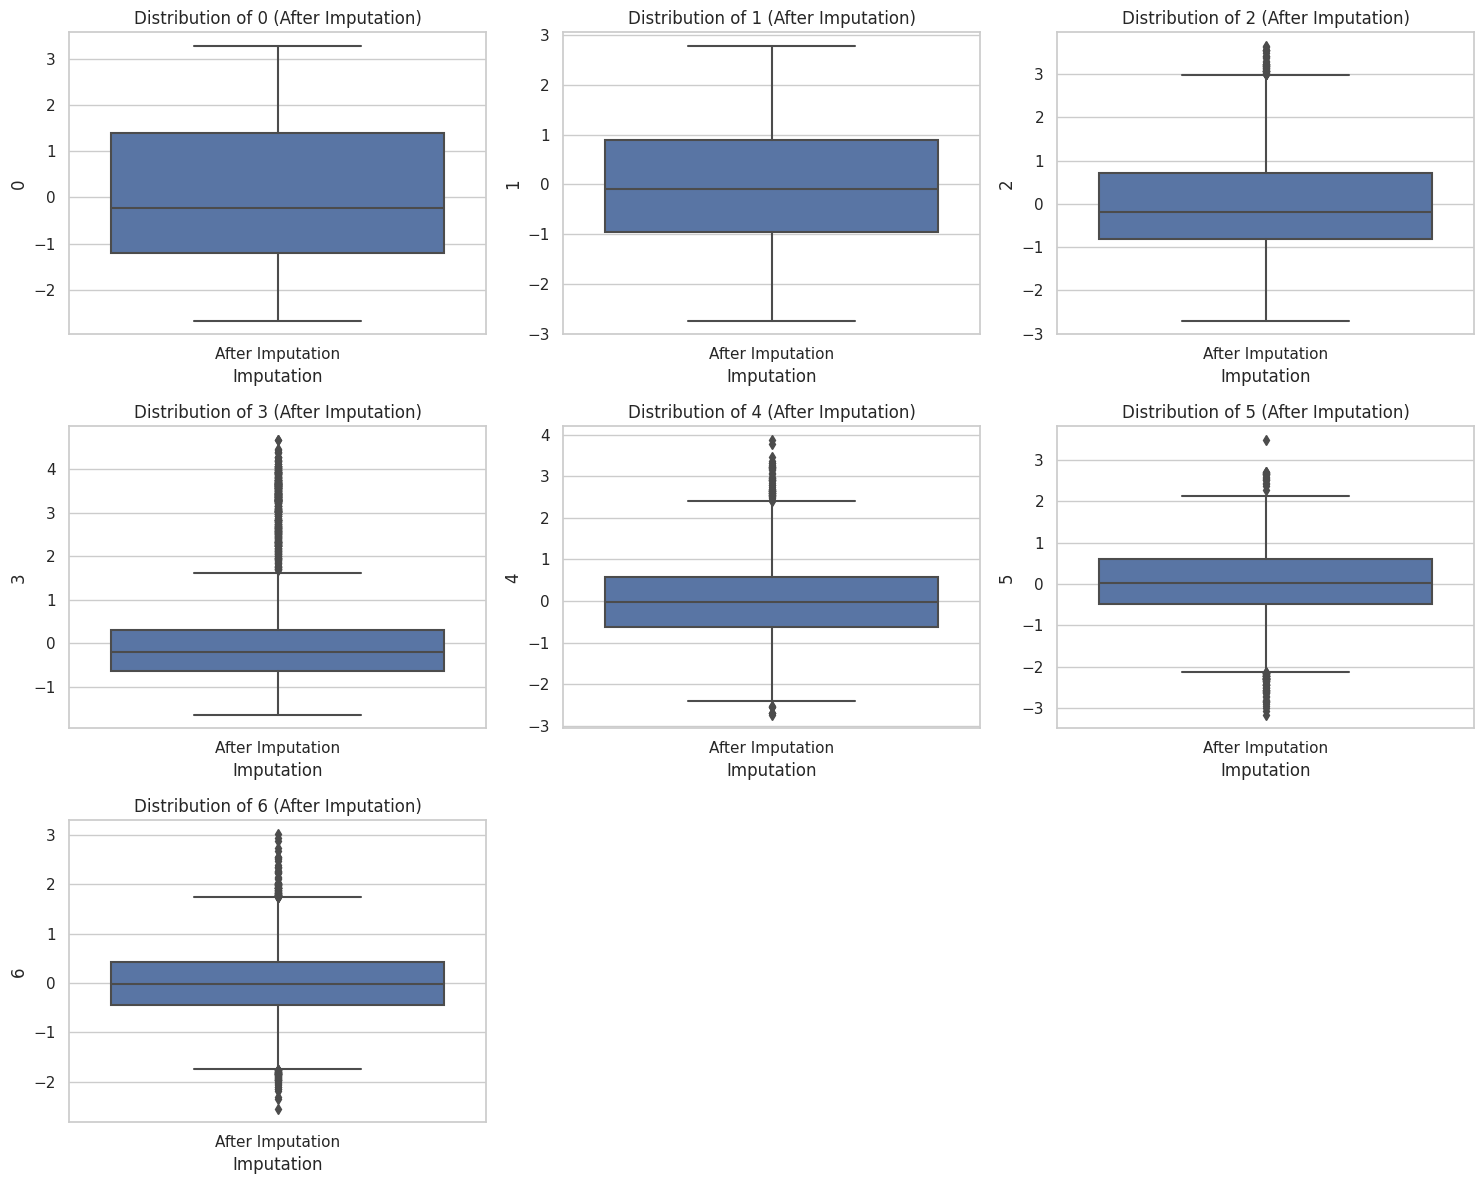


Analysis Summary:
1. Box plots display the distribution of each feature after imputation.
2. The 'Imputation' label is added for clarity.
3. Number of features analyzed: 7


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_pca_imputed is your DataFrame after imputation
# Create a copy of the DataFrame without the target variable 'Weekly_Sales' for visualization
df_visualization = df_pca_imputed.drop('Weekly_Sales', axis=1)

# Add a column to indicate that these are post-imputation features
df_visualization['Imputation'] = 'After Imputation'

# Get the number of features excluding the 'Weekly_Sales' and 'Imputation' columns
num_features = len(df_visualization.columns) - 1

# Determine the layout for subplots
num_rows = (num_features // 3) + 1  # 3 features per row
num_cols = 3

# Visualize the distribution of features after imputation
plt.figure(figsize=(15, num_rows * 4))  # Adjust figure size for clarity
sns.set(style="whitegrid")

# Plotting box plots for each feature after imputation
for i, feature in enumerate(df_visualization.columns[:-1]):  # Exclude the 'Imputation' column
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x='Imputation', y=feature, data=df_visualization)
    plt.title(f'Distribution of {feature} (After Imputation)')

plt.tight_layout()
plt.show()

# Analysis Summary
print("\nAnalysis Summary:")
print("1. Box plots display the distribution of each feature after imputation.")
print("2. The 'Imputation' label is added for clarity.")
print(f"3. Number of features analyzed: {num_features}")


Note from above code -
- This code creates a separate DataFrame (df_visualization) for the purpose of visualization, excluding 'Weekly_Sales' from the visualization, as it's our target variable. 
- The 'Imputation' column is used as a label for clarification. 
- This approach keeps 'Weekly_Sales' preserved in your original df_pca_imputed DataFrame for any subsequent analysis or modeling.

##  <font color = 'blue'> 5. Implementation of Cross-Validation for Model Selection </font>
- Splits the data from df_pca_imputed into features (X) and target (y, which is 'Weekly_Sales').
- Splits the dataset into training and testing sets.
- Defines and fits a RandomForestRegressor model.
- Evaluates the model using RMSE and R2 scores on the test data.
- Performs cross-validation and calculates the mean and standard deviation of the RMSE scores.
- Displays the results before and after cross-validation in a clear and concise manner.
- Splits the data from df_pca_imputed into features (X) and target (y, which is 'Weekly_Sales').
- Splits the dataset into training and testing sets.
- Defines and fits a RandomForestRegressor model.
- Evaluates the model using RMSE and R2 scores on the test data.
- Performs cross-validation and calculates the mean and standard deviation of the RMSE scores.
- Displays the results before and after cross-validation.

In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
from math import sqrt

# Assuming df_pca_imputed is the DataFrame after PCA and missing values imputation
# Use 'Weekly_Sales' as the target variable

# Split the data into features and target
X = df_pca_imputed.drop('Weekly_Sales', axis=1)
y = df_pca_imputed['Weekly_Sales']

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_valid)

# Calculate RMSE and R^2 on the test data
rmse_before_cv = sqrt(mean_squared_error(y_valid, y_pred))
r2_before_cv = r2_score(y_valid, y_pred)

# Perform cross-validation
# cv_results = cross_val_score(model, X, y, cv=5, scoring=make_scorer(mean_squared_error))
cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))


# Calculate RMSE for each cross-validation fold
rmse_cv = [sqrt(score) for score in cv_results]

# Display results in a DataFrame
results_dict = {
    'Metric': ['RMSE Before CV', 'R2 Before CV', 'Mean RMSE CV', 'Std RMSE CV'],
    'Value': [rmse_before_cv, r2_before_cv, sum(rmse_cv)/len(rmse_cv), max(rmse_cv) - min(rmse_cv)]
}

results_df = pd.DataFrame(results_dict)

# Display the model evaluation results
print("\nModel Evaluation:")
print("Results Before Cross-Validation:")
print(f"RMSE: {rmse_before_cv}")
print(f"R2: {r2_before_cv}")
print("\nCross-Validation Results:")
print("Mean RMSE:", cv_results.mean())
print("Std RMSE:", cv_results.std())
print("\nConsolidated Results:")
print(results_df)




Model Evaluation:
Results Before Cross-Validation:
RMSE: 338838.4682397311
R2: 0.6732674398949623

Cross-Validation Results:
Mean RMSE: 125978592096.07231
Std RMSE: 11019844410.086437

Consolidated Results:
           Metric          Value
0  RMSE Before CV  338838.468240
1    R2 Before CV       0.673267
2    Mean RMSE CV  354599.285045
3     Std RMSE CV   39843.234774


##  <font color = 'blue'> 6. Exploration of More Complex Models for Improved Predictions </font>



### Importing libraries for the models.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC

###  <font color = 'blue'> Linear Regression </font>

### We are cleaning dataset, removing imputation column and then training linear regression. r^2 is bad on training and test sets.

In [27]:
# Check if 'Imputation' column exists in X_train and X_test, and remove it if present
if 'Imputation' in X_train.columns:
    X_train = X_train.drop('Imputation', axis=1)
if 'Imputation' in X_test.columns:
    X_test = X_test.drop('Imputation', axis=1)
if 'Imputation' in X_valid.columns:
    X_valid = X_valid.drop('Imputation', axis=1)

In [28]:
from sklearn.linear_model import LinearRegression

# Fit the linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Evaluate the model's performance
training_r2 = linear_model.score(X_train, y_train)
test_r2 = linear_model.score(X_valid, y_valid)

# Print the R² scores
print(f"Training R²: {training_r2:.4f}")
print(f"Valid R²: {test_r2:.4f}")


Training R²: 0.1379
Valid R²: 0.1654


###  <font color = 'blue'> Lasso </font>

### Running the Lasso regression to perform possible variable selection. The result is identical to linear regression, so no hyper parameter tuning is required. 

In [29]:
from sklearn.linear_model import Lasso

# Initialize and fit the Lasso regression model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

# Evaluate the model's performance
training_r2 = lasso_model.score(X_train, y_train)
test_r2 = lasso_model.score(X_valid, y_valid)

# Print the R² scores
print(f"Training R²: {training_r2:.4f}")
print(f"Valid R²: {test_r2:.4f}")


Training R²: 0.1379
Valid R²: 0.1654


###  <font color = 'blue'> Random Forest </font>

### Random forest with no hyperparameter tuning has high overfitting, but much better r^2 result than linear regression. 

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the random forest
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [10, 20, 30, None],   # Maximum number of levels in tree
    # Add other parameters here if needed
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Best parameter combination found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model found by GridSearchCV
best_rf_model = grid_search.best_estimator_
training_r2 = best_rf_model.score(X_train, y_train)
test_r2 = best_rf_model.score(X_valid, y_valid)

# Print the R² scores
print(f"Training R²: {training_r2:.4f}")
print(f"Valid R²: {test_r2:.4f}")


Fitting 3 folds for each of 24 candidates, totalling 72 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best Parameters: {'max_depth': 30, 'max_features': 'auto', 'n_estimators': 200}
Training R²: 0.9502
Valid R²: 0.6718


###  <font color = 'blue'> GridSearch is used to get best hyperpameter for RandomForest  </font>

### Doing Gridsearch for hyperparameter tuning to reduce overfitting and try to improve performance of the model. 'max_depth': 16, 'min_samples_split': 3, 'n_estimators': 200 are the best suggested hyperparameters based on the Gridsearch result. 

### After hyperparameter tuning overfitting is less of an issue, and performance on the test set was minimally affected. This is due to reduced depth of the trees as well as an increase in number of samples required before split could be performed. Instead of the suggested 200 estimators, we tried with 400 which improved the performance on the test set. Increasing the n_stimator increases the number of trees that are averaged to obtain the final prediction. 

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    "n_estimators": [200],
    "max_depth": [8, 12, 16],
    "min_samples_split": [3, 5]
}

# Initialize GridSearchCV with RandomForestRegressor and the defined parameter grid
rf_cv = GridSearchCV(rf_model, param_grid=param_grid, verbose=3, cv=3, n_jobs=-1, scoring='r2')

# Fit GridSearchCV to the training data
rf_cv.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", rf_cv.best_params_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters: {'max_depth': 16, 'min_samples_split': 3, 'n_estimators': 200}


In [32]:
from sklearn.ensemble import RandomForestRegressor

# Assuming best_params contains the optimal parameters found by GridSearchCV
# Replace with actual best parameters if they are different
best_params = rf_cv.best_params_  # Example: {'max_depth': 16, 'min_samples_split': 3, 'n_estimators': 400}

# Initialize the RandomForestRegressor with the best parameters
rf_model = RandomForestRegressor(**best_params)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Evaluate the model's performance on training and test sets
training_r2 = rf_model.score(X_train, y_train)
test_r2 = rf_model.score(X_valid, y_valid)

# Print the R² scores
print(f"Training R²: {training_r2:.4f}")
print(f"Valid R²: {test_r2:.4f}")


Training R²: 0.9201
Valid R²: 0.6617


###  <font color = 'Blue'> GridSearch is used to get best hyperpameter for GradientBoost  </font>

### Doing Gridsearch for hyperparameter tuning to reduce overfitting and try to improve performance of the model. n_estimators = 500, max_depth = 16, subsample = 0.9, learning_rate = 0.05, min_samples_split = 5 are the best suggested hyperparameters by the Gridsearch. 

In [33]:
# GradientBoos hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
param_grid = {"n_estimators":[300, 500],
             "max_depth":[8,12, 16],
             "min_samples_split":[3, 5],
              "subsample" :[0.8,0.9],
             "learning_rate":[0.05, 0.1],
              }
gb_model = GradientBoostingRegressor()
gb_cv = GridSearchCV(gb_model, param_grid = param_grid, verbose = 3)
gb_cv.fit(X_train, y_train)
print(gb_cv.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=300, subsample=0.8;, score=0.583 total time=   4.6s
[CV 2/5] END learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=300, subsample=0.8;, score=0.606 total time=   4.6s
[CV 3/5] END learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=300, subsample=0.8;, score=0.609 total time=   4.6s
[CV 4/5] END learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=300, subsample=0.8;, score=0.534 total time=   4.6s
[CV 5/5] END learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=300, subsample=0.8;, score=0.577 total time=   4.6s
[CV 1/5] END learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=300, subsample=0.9;, score=0.576 total time=   5.2s
[CV 2/5] END learning_rate=0.05, max_depth=8, min_samples_split=3, n_estimators=300, subsample=0.9;, score=0.599 total time=   5.2s
[CV 3/5] END l

###  <font color = 'blue'> GradientBoost  </font>

### Gradient boost even with fine tuning is exteremly overfit with perfect performance on training set because of the high number of estimators, meaning the model continues to find patterns in its mistakes even when there are none. Although we tried lower number of estimators, the model was still very overfit. 

In [34]:
# n_estimator = 1000 min_sample_split = 4
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators = 500, max_depth = 16, subsample = 0.8, learning_rate = 0.05, min_samples_split = 5 )
gb_model.fit(X_train,y_train)
print(f"Training r^2: {gb_model.score(X_train,y_train):.4f}")
print(f"Valid r^2: {gb_model.score(X_valid,y_valid):.4f}")

Training r^2: 1.0000
Valid r^2: 0.6902


###  <font color = 'blue'> GridSearch is used to get best hyperpameter for SVM  </font>

### Trying a Gridsearch to get the best hyperparameter for the SVM model. 

In [35]:
param_grid = {"kernel":["linear", "rbf"],
              "C": [0.1, 1, 10, 100, 1000, 10000],
              "epsilon": [0.001, 0.01, 0.1, 1, 10]
              }
from sklearn.svm import SVR
svr_model = SVR()
svr_cv = GridSearchCV(svr_model, param_grid = param_grid, verbose = 1)
svr_cv.fit(X_train, y_train)
print(svr_cv.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'C': 10000, 'epsilon': 0.001, 'kernel': 'rbf'}


###  <font color = 'blue'> SVM  </font>

### Performed hyperparameter tuning which suggested extreme values for epsilon and C and we were still not able to improve the performance of the SVM model much. 

In [36]:
#SVM after PCA is not optimal in this case.
svr = SVR(kernel='rbf', C=10000, epsilon = 0.00001)
svr.fit(X_train, y_train)
print(f"Training r^2: {svr.score(X_train,y_train):.4f}")
print(f"Valid r^2: {svr.score(X_valid,y_valid):.4f}")

Training r^2: 0.1956
Valid r^2: 0.2048


### After performing all hyperparameter tuning and evaluation on validation set for the 5 models above, the model performed best on the tuned random forest, now we will evaluate on the test set to make sure there is no performance difference on the test and validation sets. This will ensure there are no overfitting on the validation set. 

In [37]:
model = gb_model
predictions = model.predict(X_test)
mae = mean_absolute_error(predictions, y_test)
rmse = sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print(f'Test MAE: {mae:.1f}')
print(f'Test RMSE: {rmse:.2f}')
print(f'Test r^2: {r2:.4f}')

Test MAE: 221695.3
Test RMSE: 328115.05
Test r^2: 0.6709


In [38]:
print(X_valid.shape)
print(X_test.shape)

(893, 7)
(893, 7)


##  <font color = 'blue'> 7. Implementation of Time Series Models for Weekly Sales Forecasting </font>



### Performing Time Series analysis on our data since our sales data depends on time. For time series, python requires the date variable to be a dataframe index and a non random train-test split. Because older information will be used to predict the newer cells. In addition, instead opf predicting daily sales, we are predicting change in sales from week to week. 

In [39]:
df = pd.read_csv('../input/walmart-dataset/Walmart.csv')
#df = pd.read_csv('Walmart.csv')
df["Date"] = pd.to_datetime(df["Date"], dayfirst = True)
df = df.sort_values(by = 'Date', ascending = True)
df.set_index("Date", inplace = True)
df_week = df.resample("W").mean()
df_week_diff = df_week["Weekly_Sales"].diff().dropna()
train_data_diff = df_week_diff[:int(0.8*len(df_week_diff))]
test_data_diff = df_week_diff[int(0.8*len(df_week_diff)):]
# splitting raw data as well
train_data = df[:int(0.8*len(df_week_diff))]
test_data = df[int(0.8*len(df_week_diff)):]
Xts_train = train_data.iloc[:, 2:]
Xts_test = test_data.iloc[:, 2:]
yts_train = train_data["Weekly_Sales"]
y_test = test_data["Weekly_Sales"]

### Holtwinters is the model that decomposes the time series variable into trend, seasonality, and other effects. Trend is the part of the data that constantly increases or decreases over time, seasonality are changes that happen on a predicted schedule in this case holiday sales, and other effects are whatever else left over after taking into accounbt the seasonality and trend. Since the Walmart data shows both trend and sesasonality, this seemed an appropriate choice of model. 

In [40]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### We fit the data on the first 20 percent of the observations, and used our model to predict the last 20 percent. Additive models follow a linear pattern where the effect of the trend and seasonality follow a linear or additive pattern because the data takes place over a short period of time during a stable economy there is no need to look for exponential or multiplicative effects of trend or seasonality. The results are plotted below:

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


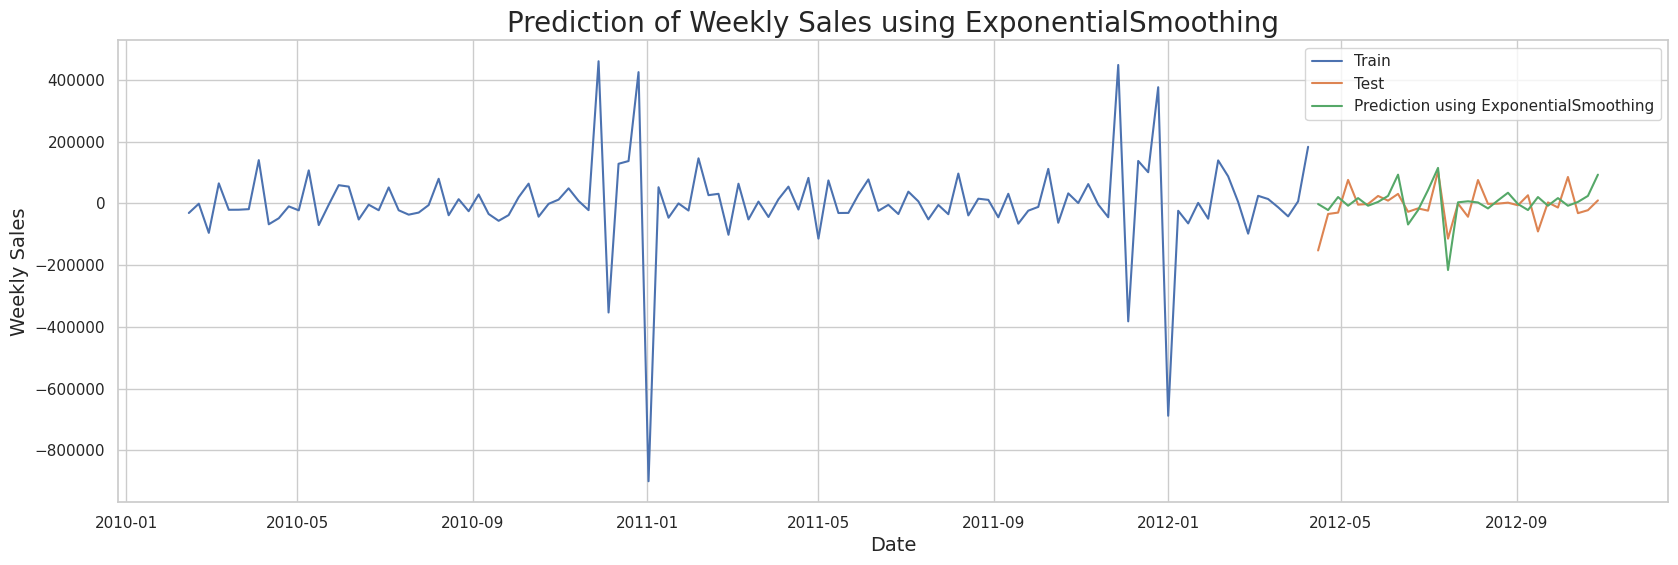

In [41]:
model_holt_winters = ExponentialSmoothing(train_data_diff, seasonal_periods=20, seasonal='additive',
                                           trend='additive',damped=True).fit() #Taking additive trend and seasonality.
y_pred = model_holt_winters.forecast(len(test_data_diff))# Predict the test data

#Visualize train, test and predicted data.
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using ExponentialSmoothing', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction using ExponentialSmoothing')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

### Weighting the results whether it is holiday or not. We are multiplying the error by 5 on holidays and not multiplying by 5 for non holidays. 

In [42]:
pred_df = pd.DataFrame({"actual_diff":test_data_diff, "predicted_diff":y_pred, "abs_error":np.abs(test_data_diff - y_pred)})

### The predictions for the time series model were off on average for 44640 dollars per week. Since this is data from multiple stores, the results are reasonable as shown on the plot above.

In [43]:
mae = np.mean(pred_df["abs_error"])
mae

44639.45928817357

In [44]:
pred_df

,actual_diff,predicted_diff,abs_error
2012-04-15,-152734.543556,-2364.775341,150369.768215
2012-04-22,-34594.036222,-21888.164831,12705.871391
2012-04-29,-30127.353111,20217.459907,50344.813018
2012-05-06,75719.978667,-7841.800917,83561.779584
2012-05-13,-4407.087556,16787.540647,21194.628203
2012-05-20,-2265.328222,-7890.539098,5625.210876
2012-05-27,23744.979778,4395.288179,19349.691599
2012-06-03,8648.586889,23940.235405,15291.648516
2012-06-10,30433.823556,92731.644056,62297.820500
2012-06-17,-27534.690667,-68646.054275,41111.363609
